# **MOTIONS AND CONTROL OF MARINE VEHICLES**

---



---


## DEN462E
## TERM PROJECT
### Ulaş Özen
### 080190713 


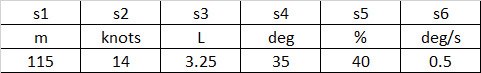

In [ ]:
Lenght = L = 115 #m
speed_fwd = u = 7.2016 #m/s
speed_loss = 0.4
Steadt_Speed = u_std = 0.45*u #m/s
std = 3.25 #L
Steady_Turning_Diameter = dtc = L*std #m
Steady_Turning_Radius = rtc = dtc/2 #m
rudder_angle = 35 #deg
rb = 0.5 #deg/s


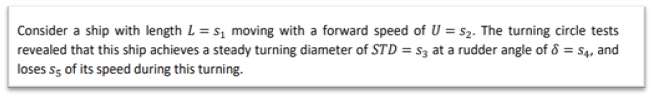

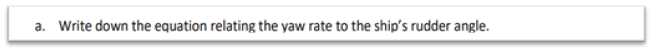

In [ ]:
Yaw_rate = (u_std/rtc) #rad/s
r = Yaw_rate_deg_s = Yaw_rate*57.29 #deg/s
Yaw_rate_deg_s

0.9935028698327759

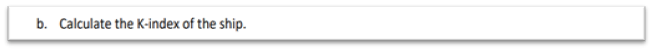

In [ ]:
K_index = K = r/rudder_angle
K #1/s

0.028385796280936456

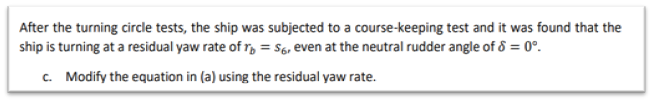

In [ ]:
rudder_angle_given = 0
modified_yaw_rate =(K*rudder_angle_given)+rb
modified_yaw_rate #deg/s

0.5

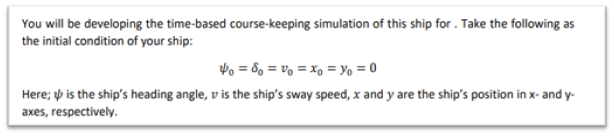

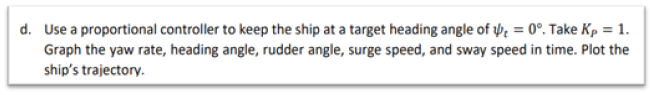

In [ ]:
import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib.pyplot as plt

#################↓ Coef #####################################
K_index = K = 0.028389  # 1/s
Resudual_yaw_rate = K_0 = 0.5  # deg/s
u_std = 3.24072  # m/s
psi_target = 0  # deg
Kp = 1/(2*K) #you can change the K value
##################################################################

# Write a time value
t = int(input("How many seconds do you want for observation? "))


df = pd.DataFrame(index=range(t+1), columns=['t', 'r', 'psi', 'delta', 'u', 'v', 'x', 'y'])


df.loc[0] = [0, 0, 0, 0, u_std, 0, 0, 0]


for i in range(1, t+1):
    df.loc[i, 't'] = i
    df.loc[i, 'r'] = K * df.loc[i-1, 'delta'] + K_0
    df.loc[i, 'psi'] = df.loc[i-1, 'psi'] + df.loc[i, 'r'] * (df.loc[i, 't'] - df.loc[i-1, 't'])
    df.loc[i, 'delta'] = Kp * (psi_target - df.loc[i, 'psi'])
    df.loc[i, 'u'] = u_std * cos(df.loc[i, 'psi'] * pi / 180)
    df.loc[i, 'v'] = u_std * sin(df.loc[i, 'psi'] * pi / 180)
    df.loc[i, 'x'] = df.loc[i-1, 'x'] + df.loc[i, 'u'] * (df.loc[i, 't'] - df.loc[i-1, 't'])
    df.loc[i, 'y'] = df.loc[i-1, 'y'] + df.loc[i, 'v'] * (df.loc[i, 't'] - df.loc[i-1, 't'])


print("↓"*100)

df






How many seconds do you want for observation? 100
↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓


,t,r,psi,delta,u,v,x,y
0,0,0,0,0,3.24072,0,0,0
1,1,0.5,0.5,-8.806228,3.240597,0.02828,3.240597,0.02828
2,2,0.25,0.75,-13.209342,3.240442,0.04242,6.481039,0.0707
3,3,0.125,0.875,-15.410899,3.240342,0.049489,9.721381,0.120189
4,4,0.0625,0.9375,-16.511677,3.240286,0.053024,12.961667,0.173213
...,...,...,...,...,...,...,...,...
96,96,0.0,1.0,-17.612456,3.240226,0.056558,311.062559,5.373048
97,97,0.0,1.0,-17.612456,3.240226,0.056558,314.302786,5.429606
98,98,0.0,1.0,-17.612456,3.240226,0.056558,317.543012,5.486164
99,99,0.0,1.0,-17.612456,3.240226,0.056558,320.783238,5.542723


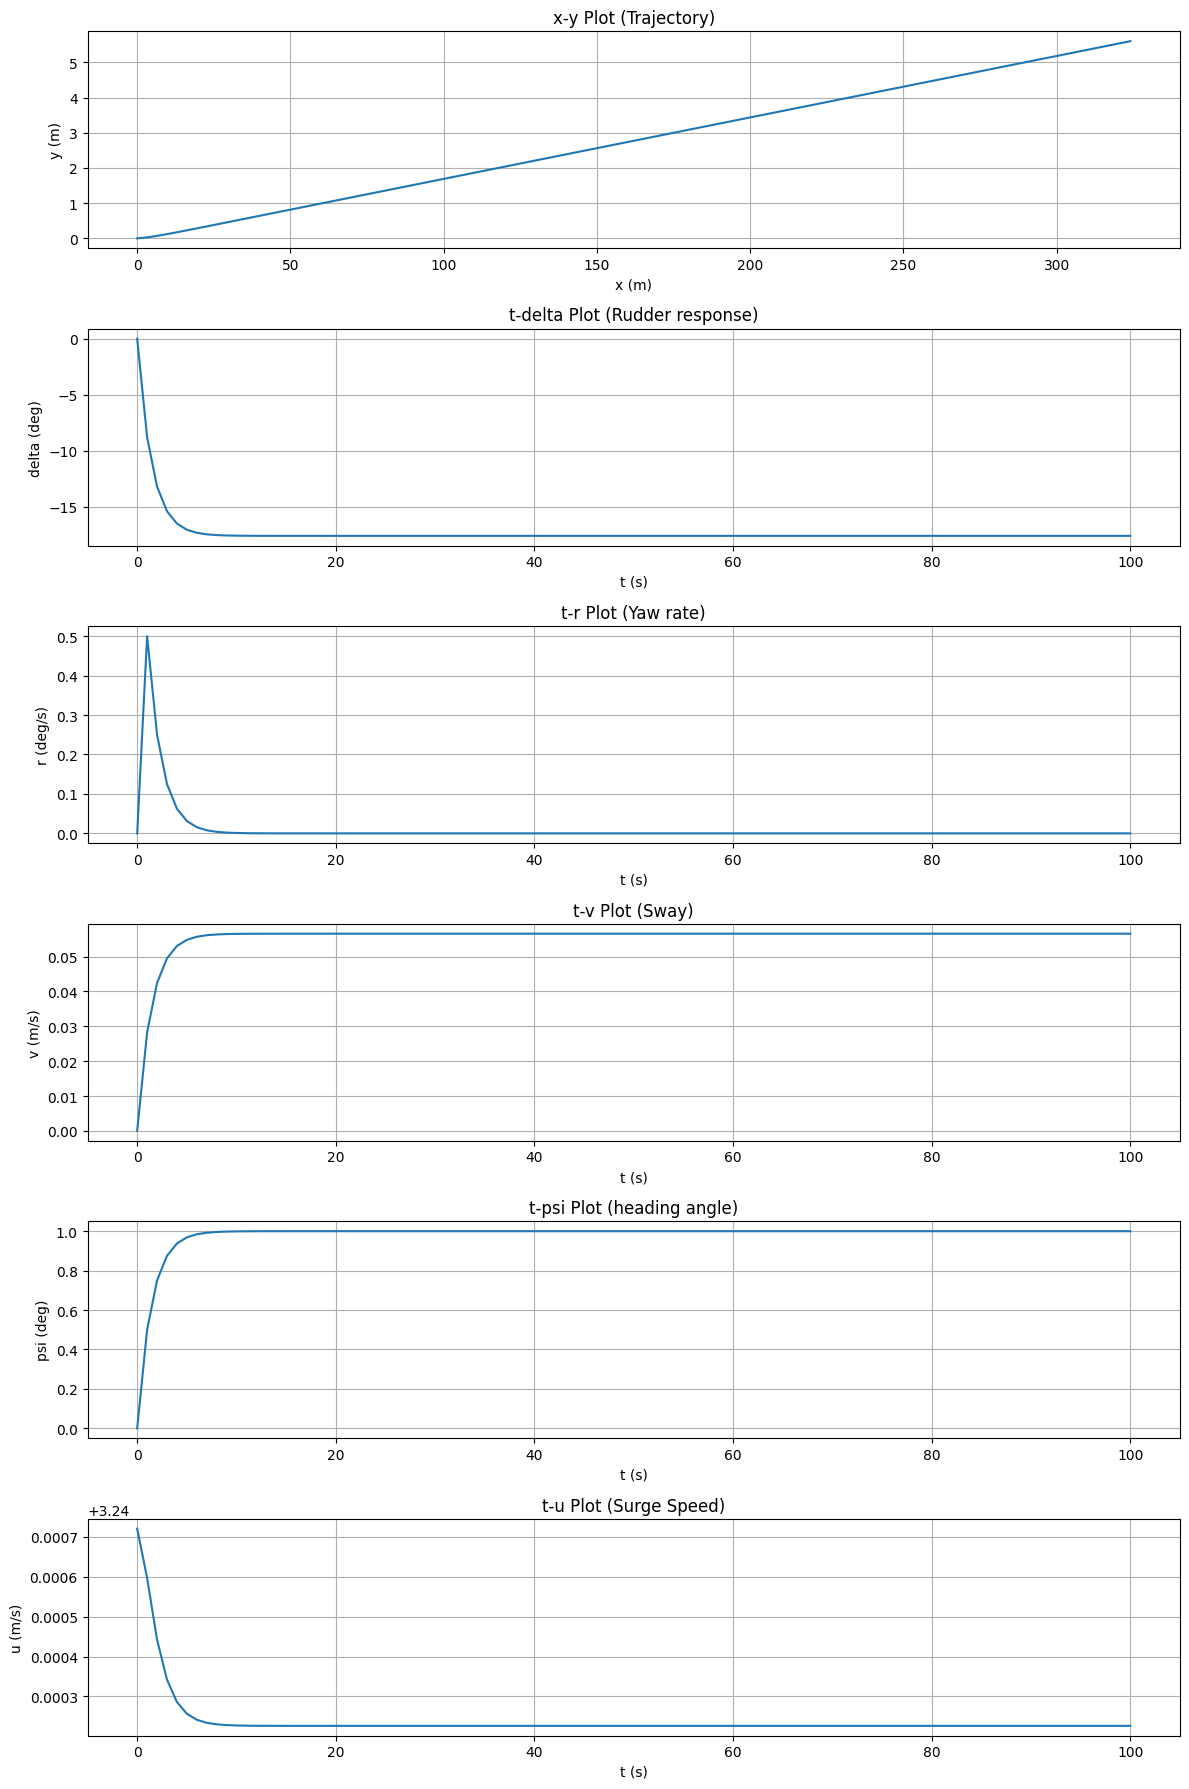

In [ ]:
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Plot x and y
axs[0].plot(df['x'], df['y'])
axs[0].set_xlabel('x (m)')
axs[0].set_ylabel('y (m)')
axs[0].set_title('x-y Plot (Trajectory)')
axs[0].grid(True)

# Plot t and delta
axs[1].plot(df['t'], df['delta'])
axs[1].set_xlabel('t (s)')
axs[1].set_ylabel('delta (deg)')
axs[1].set_title('t-delta Plot (Rudder response)')
axs[1].grid(True)

# Plot t and r
axs[2].plot(df['t'], df['r'])
axs[2].set_xlabel('t (s)')
axs[2].set_ylabel('r (deg/s)')
axs[2].set_title('t-r Plot (Yaw rate)')
axs[2].grid(True)

# Plot t and v
axs[3].plot(df['t'], df['v'])
axs[3].set_xlabel('t (s)')
axs[3].set_ylabel('v (m/s)')
axs[3].set_title('t-v Plot (Sway)')
axs[3].grid(True)

# Plot t and psi
axs[4].plot(df['t'], df['psi'])
axs[4].set_xlabel('t (s)')
axs[4].set_ylabel('psi (deg)')
axs[4].set_title('t-psi Plot (heading angle)')
axs[4].grid(True)

# Plot t and u
axs[5].plot(df['t'], df['u'])
axs[5].set_xlabel('t (s)')
axs[5].set_ylabel('u (m/s)')
axs[5].set_title('t-u Plot (Surge Speed)')
axs[5].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
